In [2]:
# Show brain human after CT scan 

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('brain.jpg',0)
img.shape
cv2.imshow('image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

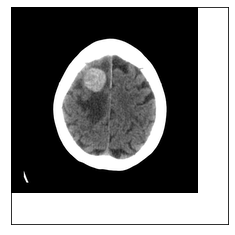

In [15]:
#Covert image into gray

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('brain.jpg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap = 'gray', interpolation = 'lanczos')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.plot([700,600,500],[500,500,700],'y', linewidth=0)
plt.show()

In [21]:
# Capture image from camera

import numpy as np
import cv2

cap = cv2.VideoCapture(1)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out.write(frame)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

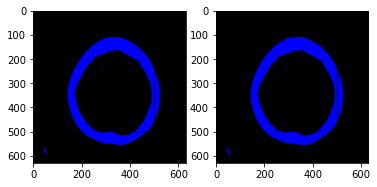

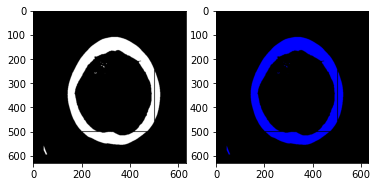

In [19]:
# Masking image into white or orange colour

import numpy as np
import cv2

img = cv2.imread('brain.jpg',cv2.IMREAD_COLOR)
img2= cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
cv2.rectangle(img2,(500,500),(90,30),(400,10,125),2)
cv2.rectangle(img,(500,500),(90,30),(400,10,125),2)

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
mask = cv2.inRange(img2, light_orange, dark_orange)
result = cv2.bitwise_and(img2, img2, mask=mask)

#cv2.circle(img,(447,63), 63, (0,0,255), -1)
#cv2.ellipse(img,(400,300),(300,100),800,800,100,100,-1)

pts = np.array([[100,500],[200,300],[700,200],[500,100]], np.int32)
pts = pts.reshape((-1,1,2))
#cv2.polylines(img2,[pts], True ,(10,255,255))

font = cv2.FONT_HERSHEY_TRIPLEX 
cv2.putText(img2,'brain',(100,100), font, 2, (50,90,130), 2, cv2.LINE_AA)

light_white = (0, 0, 200)
dark_white = (145, 60, 255)
mask_white = cv2.inRange(img2, light_white, dark_white)
result_white = cv2.bitwise_and(img2, img2, mask=mask_white)
plt.subplot(1, 2, 1)
plt.imshow(result_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()


final_mask = mask + mask_white
final_result = cv2.bitwise_and(img2, img2, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()


cv2.imshow('image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:


import os, cv2, random
import numpy as np
import matplotlib.pyplot as plt


#show image
def displayImage(input_img, display_title=None):
    im_shape = input_img.shape
    c = 3
    if len(im_shape) >= 3:
        c = im_shape[2]
    if len(im_shape) == 2:
        c = 1

    if c == 3:
        rgb_img = cv2.cvtColor(input_img.copy(), cv2.COLOR_BGR2RGB)
        plt.imshow(rgb_img)
    if c == 1:
        plt.imshow(input_img,cmap='gray')

    plt.axis('off')
    plt.grid(False)
    if not display_title is None:
        plt.title(display_title)
    plt.show()
    
    def featureExtractor(image, fd):
    kpts, desc = fd.detectAndCompute(image, None)
    return kpts, desc


def featureMatching(kpts1, desc1, kpts2, desc2, fd='kaze'):

    if desc1 is None and desc_2 is None:
        print('Empty descriptor')
        return

    if fd == 'akaze':
        # create BFMatcher object
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
        # Match descriptors.
        matches = bf.match(desc1, desc2)
        # Sort them in the order of their distance.
        matches = sorted(matches, key = lambda x:x.distance)
        # good_matches = matches[:10]
        return matches
    else:
        
        # Matching descriptor vectors with a FLANN based matcher
        matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
        knn_matches = matcher.knnMatch(desc1, desc2, 2)
        # Filter matches using the Lowe's ratio test
        good_matches = []
        for m,n in knn_matches:
            ratio_thresh = 0.7
            if m.distance < ratio_thresh * n.distance:
                good_matches.append(m)
        return good_matches


def reprojectionError(matches, kpts1, kpts2, M):
    ptsA = np.float32([ kpts1[m.queryIdx].pt for m in good_matches ])
    ptsA_ = ptsA.reshape(-1,1,2)
    ptsB = np.float32([ kpts2[m.trainIdx].pt for m in good_matches ])

    ptsB_ = cv2.perspectiveTransform(ptsA_, M)
    ptsB_ = ptsB_.reshape(ptsB.shape)
    reproj_err = 0.

    for i in range(len(ptsB)):
        delx = ptsB[i][0] - ptsB_[i][0]
        delx *= delx
        
        # Matching descriptor vectors with a FLANN based matcher
        matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
        knn_matches = matcher.knnMatch(desc1, desc2, 2)
        # Filter matches using the Lowe's ratio test
        good_matches = []
        for m,n in knn_matches:
            ratio_thresh = 0.7
            if m.distance < ratio_thresh * n.distance:
                good_matches.append(m)
        return good_matches


def reprojectionError(matches, kpts1, kpts2, M):
    ptsA = np.float32([ kpts1[m.queryIdx].pt for m in good_matches ])
    ptsA_ = ptsA.reshape(-1,1,2)
    ptsB = np.float32([ kpts2[m.trainIdx].pt for m in good_matches ])

    ptsB_ = cv2.perspectiveTransform(ptsA_, M)
    ptsB_ = ptsB_.reshape(ptsB.shape)
    reproj_err = 0.

    for i in range(len(ptsB)):
        delx = ptsB[i][0] - ptsB_[i][0]
        delx *= delx
        draw_params = dict(matchColor = (0,0,255), # draw matches in green color
                        singlePointColor = None,
                        matchesMask = matchesMask, # draw only inliers
                        flags = 2)

        result = cv2.drawMatches(img1, kpts1, img2, kpts2, good_matches, None,**draw_params)
        # Draw bounding box in Red
        cv2.polylines(result, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)
        displayImage(result, 'result')
        return M


fd = {
    'kaze': cv2.KAZE_create(),
    'akaze': cv2.AKAZE_create()
}
key = 'akaze'

detect = 'path/to/cropped/template/of/the/object/to/be/detected'
target = 'path/to/target/image/where/the/object/to/be/detected'

template = cv2.imread(detect)
scene = cv2.imread(target)
# extract features form the template image
kpts1, desc1  = featureExtractor(template, fd[key])
# extract features form the scene image
kpts2, desc2 = featureExtractor(scene, fd[key])

good_matches = featureMatching(kpts1, desc1, kpts2, desc2, key)

if good_matches is not None:
    M = drawMatches(scene, template, good_matches, kpts1, desc1, kpts2, desc2)
    reprojection_error = reprojectionError(good_matches, kpts1, kpts2, M)
    print(f'Reprojection error: {reprojection_error}')

In [ ]:

import cv2
import argparse
import numpy as np

ap = argparse.ArgumentParser()
ap.add_argument('-i', '--image', required=True,
                help = 'path to input image')
ap.add_argument('-c', '--config', required=True,
                help = 'path to yolo config file')
ap.add_argument('-w', '--weights', required=True,
                help = 'path to yolo pre-trained weights')
ap.add_argument('-cl', '--classes', required=True,
                help = 'path to text file containing class names')
args = ap.parse_args()


def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    
image = cv2.imread(args.image)
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('brain.jpg',cv2.IMREAD_GRAYSCALE)

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

classes = None

with open(args.classes, 'r') as f:
    classes = [line.strip() for line in f.readlines()]

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

net = cv2.dnn.readNet(args.weights, args.config)

blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)

outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4


for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

cv2.imshow("object detection", image)
cv2.waitKey()
    
cv2.imwrite("object-detection.jpg", image)
cv2.destroyAllWindows()

In [28]:
# Object detection with library

import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox


im= cv2.imread('uis.jpg',1)
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)

cv2.imshow('image',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

#print('Number of car in the image is '+ str(label.count('car')))


In [29]:
import cv2

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread("brains.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find bounding box
x,y,w,h = cv2.boundingRect(thresh)
cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
cv2.putText(image, "w={},h={}".format(w,h), (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (36,255,12), 2)

cv2.imshow("thresh", thresh)
cv2.imshow("image", image)
cv2.waitKey()

-1

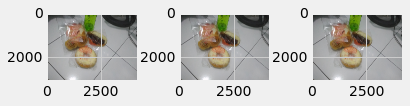

In [16]:

from matplotlib import pyplot
from matplotlib.image import imread


# define location of dataset
folder = 'Documents/'
# plot first few images
for i in range(3):
    # define subplot
      pyplot.subplot(330 + 1 + i)
    # define filename
      img = folder + 'uii.' + str(i) + '.jpg'
    # load image pixels
      image = imread('uii.jpg')
    # plot raw pixel data
      pyplot.imshow(image)
    # show the figure
pyplot.show()

In [ ]:
import cv2
import numpy as np
def sum_cnn(image,x,y):
    x1,y1=np.shape(image)
    temp=image

    for i in range(0,x1-x):
        for j in range(0,y1-y):
            temp1=np.sum(image[i:i+x,j:j+y])/(x*y)
            if temp1 in range(850000,1100000):
                cv2.rectangle(temp, (i, j), (i+20, j+20), (0, 255, 0), 2)
                print ("\n")


    return temp


image =cv2.imread('home.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=np.matrix(image)

temp=sum_cnn(image,95,95)

cv2.imshow('Processed Video', temp)
cv2.imwrite('1.jpg',temp)

print ("Done")